In [18]:
from pytorch_lightning import Trainer
from models import Model, LitCHLPModel
import torch
from datasets import IMDBHypergraphDataset
from utils import pre_transform, transform
from pytorch_lightning.callbacks import EarlyStopping
from datasets import train_test_split, collate_fn
from torch.utils.data import DataLoader
import lightning as L
from pytorch_lightning.tuner import Tuner

In [19]:
dataset = IMDBHypergraphDataset("./data", pre_transform=pre_transform, transform=transform, force_reload=True)
train_dataset, test_dataset, _, _, _, _ = train_test_split(dataset, test_size=0.3)
train_dataset, validation_dataset, _, _, _, _ = train_test_split(train_dataset, test_size=0.3)


Processing...
Done!


In [20]:
early_stop_callback = EarlyStopping(
    monitor="val_loss",
    patience=50,
    verbose=True,
    mode="min"
)

Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


/home/dariodemaio/Documents/Contextual_HLP/.venv/lib/python3.13/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:476: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.
/home/dariodemaio/Documents/Contextual_HLP/.venv/lib/python3.13/site-packages/pytorch_lightning/utilities/data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 2189. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
/home/dariodemaio/Documents/Contextual_HLP/.venv/lib/python3.13/site-packages/pytorch_lightning/utilities/data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 2058. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
/home/dariodemaio/Documents/Contextual_HLP/.venv/lib/python3.13/site-packages/pytorch_lightning/utilities/data.py:79: Trying to infer the `batch_size`

Learning rate suggerito dal LR finder: 0.0005248074602497723
Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/home/dariodemaio/Documents/Contextual_HLP/.venv/lib/python3.13/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:476: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.


Epoch 0: 100%|██████████| 7/7 [00:02<00:00,  3.31it/s, v_num=1, train_loss_step=0.367, val_loss=0.587, val_roc_auc=0.864, val_accuracy=0.855, val_precision=0.855, train_loss_epoch=0.466]

Metric val_loss improved. New best score: 0.587


Epoch 2: 100%|██████████| 7/7 [00:02<00:00,  3.04it/s, v_num=1, train_loss_step=0.246, val_loss=0.580, val_roc_auc=0.889, val_accuracy=0.867, val_precision=0.867, train_loss_epoch=0.272]

Metric val_loss improved by 0.007 >= min_delta = 0.0. New best score: 0.580


Epoch 3: 100%|██████████| 7/7 [00:02<00:00,  3.00it/s, v_num=1, train_loss_step=0.207, val_loss=0.570, val_roc_auc=0.892, val_accuracy=0.866, val_precision=0.866, train_loss_epoch=0.220]

Metric val_loss improved by 0.010 >= min_delta = 0.0. New best score: 0.570


Epoch 4: 100%|██████████| 7/7 [00:02<00:00,  3.00it/s, v_num=1, train_loss_step=0.178, val_loss=0.570, val_roc_auc=0.892, val_accuracy=0.865, val_precision=0.865, train_loss_epoch=0.180]

Metric val_loss improved by 0.000 >= min_delta = 0.0. New best score: 0.570


Epoch 5: 100%|██████████| 7/7 [00:02<00:00,  2.98it/s, v_num=1, train_loss_step=0.146, val_loss=0.564, val_roc_auc=0.899, val_accuracy=0.867, val_precision=0.867, train_loss_epoch=0.152]

Metric val_loss improved by 0.006 >= min_delta = 0.0. New best score: 0.564


Epoch 6: 100%|██████████| 7/7 [00:02<00:00,  3.05it/s, v_num=1, train_loss_step=0.139, val_loss=0.561, val_roc_auc=0.897, val_accuracy=0.872, val_precision=0.872, train_loss_epoch=0.146]

Metric val_loss improved by 0.003 >= min_delta = 0.0. New best score: 0.561


Epoch 7: 100%|██████████| 7/7 [00:02<00:00,  3.01it/s, v_num=1, train_loss_step=0.207, val_loss=0.561, val_roc_auc=0.895, val_accuracy=0.873, val_precision=0.873, train_loss_epoch=0.135]

Metric val_loss improved by 0.000 >= min_delta = 0.0. New best score: 0.561


Epoch 8: 100%|██████████| 7/7 [00:02<00:00,  3.03it/s, v_num=1, train_loss_step=0.141, val_loss=0.559, val_roc_auc=0.894, val_accuracy=0.874, val_precision=0.874, train_loss_epoch=0.126]

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.559


Epoch 10: 100%|██████████| 7/7 [00:02<00:00,  3.03it/s, v_num=1, train_loss_step=0.125, val_loss=0.559, val_roc_auc=0.900, val_accuracy=0.876, val_precision=0.876, train_loss_epoch=0.118] 

Metric val_loss improved by 0.000 >= min_delta = 0.0. New best score: 0.559


Epoch 11: 100%|██████████| 7/7 [00:02<00:00,  3.00it/s, v_num=1, train_loss_step=0.126, val_loss=0.556, val_roc_auc=0.900, val_accuracy=0.879, val_precision=0.879, train_loss_epoch=0.110] 

Metric val_loss improved by 0.003 >= min_delta = 0.0. New best score: 0.556


Epoch 13: 100%|██████████| 7/7 [00:01<00:00,  4.45it/s, v_num=1, train_loss_step=0.109, val_loss=0.558, val_roc_auc=0.899, val_accuracy=0.872, val_precision=0.872, train_loss_epoch=0.106] 

/home/dariodemaio/Documents/Contextual_HLP/.venv/lib/python3.13/site-packages/pytorch_lightning/utilities/data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 2172. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 14: 100%|██████████| 7/7 [00:02<00:00,  3.00it/s, v_num=1, train_loss_step=0.0976, val_loss=0.555, val_roc_auc=0.902, val_accuracy=0.878, val_precision=0.878, train_loss_epoch=0.109]

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.555


Epoch 18: 100%|██████████| 7/7 [00:02<00:00,  2.75it/s, v_num=1, train_loss_step=0.0863, val_loss=0.554, val_roc_auc=0.901, val_accuracy=0.878, val_precision=0.878, train_loss_epoch=0.0782]

Metric val_loss improved by 0.000 >= min_delta = 0.0. New best score: 0.554


Epoch 21: 100%|██████████| 7/7 [00:01<00:00,  4.59it/s, v_num=1, train_loss_step=0.0799, val_loss=0.555, val_roc_auc=0.900, val_accuracy=0.875, val_precision=0.875, train_loss_epoch=0.0899]

/home/dariodemaio/Documents/Contextual_HLP/.venv/lib/python3.13/site-packages/pytorch_lightning/utilities/data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 2182. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 22: 100%|██████████| 7/7 [00:02<00:00,  3.16it/s, v_num=1, train_loss_step=0.0792, val_loss=0.553, val_roc_auc=0.902, val_accuracy=0.879, val_precision=0.879, train_loss_epoch=0.0902]

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.553


Epoch 23: 100%|██████████| 7/7 [00:02<00:00,  3.19it/s, v_num=1, train_loss_step=0.0769, val_loss=0.553, val_roc_auc=0.901, val_accuracy=0.883, val_precision=0.883, train_loss_epoch=0.0872]

Metric val_loss improved by 0.000 >= min_delta = 0.0. New best score: 0.553


Epoch 24:  57%|█████▋    | 4/7 [00:01<00:00,  3.39it/s, v_num=1, train_loss_step=0.124, val_loss=0.553, val_roc_auc=0.901, val_accuracy=0.883, val_precision=0.883, train_loss_epoch=0.0872] 

/home/dariodemaio/Documents/Contextual_HLP/.venv/lib/python3.13/site-packages/pytorch_lightning/utilities/data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 2173. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 29: 100%|██████████| 7/7 [00:02<00:00,  3.19it/s, v_num=1, train_loss_step=0.137, val_loss=0.553, val_roc_auc=0.899, val_accuracy=0.880, val_precision=0.880, train_loss_epoch=0.0766] 

Metric val_loss improved by 0.000 >= min_delta = 0.0. New best score: 0.553


Epoch 30: 100%|██████████| 7/7 [00:02<00:00,  3.09it/s, v_num=1, train_loss_step=0.0818, val_loss=0.552, val_roc_auc=0.903, val_accuracy=0.882, val_precision=0.882, train_loss_epoch=0.0809]

Metric val_loss improved by 0.000 >= min_delta = 0.0. New best score: 0.552


Epoch 35:  29%|██▊       | 2/7 [00:00<00:02,  2.11it/s, v_num=1, train_loss_step=0.0544, val_loss=0.553, val_roc_auc=0.900, val_accuracy=0.879, val_precision=0.879, train_loss_epoch=0.0737]

/home/dariodemaio/Documents/Contextual_HLP/.venv/lib/python3.13/site-packages/pytorch_lightning/utilities/data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 2176. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 36: 100%|██████████| 7/7 [00:02<00:00,  3.08it/s, v_num=1, train_loss_step=0.0546, val_loss=0.554, val_roc_auc=0.896, val_accuracy=0.877, val_precision=0.877, train_loss_epoch=0.0736]

/home/dariodemaio/Documents/Contextual_HLP/.venv/lib/python3.13/site-packages/pytorch_lightning/utilities/data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 2041. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 37: 100%|██████████| 7/7 [00:02<00:00,  3.10it/s, v_num=1, train_loss_step=0.0654, val_loss=0.552, val_roc_auc=0.900, val_accuracy=0.880, val_precision=0.880, train_loss_epoch=0.0613]

Metric val_loss improved by 0.000 >= min_delta = 0.0. New best score: 0.552


Epoch 38: 100%|██████████| 7/7 [00:02<00:00,  3.15it/s, v_num=1, train_loss_step=0.0776, val_loss=0.553, val_roc_auc=0.903, val_accuracy=0.880, val_precision=0.880, train_loss_epoch=0.0791]

/home/dariodemaio/Documents/Contextual_HLP/.venv/lib/python3.13/site-packages/pytorch_lightning/utilities/data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 2196. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 40:  71%|███████▏  | 5/7 [00:01<00:00,  3.73it/s, v_num=1, train_loss_step=0.0643, val_loss=0.553, val_roc_auc=0.899, val_accuracy=0.879, val_precision=0.879, train_loss_epoch=0.089] 

/home/dariodemaio/Documents/Contextual_HLP/.venv/lib/python3.13/site-packages/pytorch_lightning/utilities/data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 2177. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 41: 100%|██████████| 7/7 [00:02<00:00,  3.17it/s, v_num=1, train_loss_step=0.0885, val_loss=0.552, val_roc_auc=0.902, val_accuracy=0.881, val_precision=0.881, train_loss_epoch=0.0657]

/home/dariodemaio/Documents/Contextual_HLP/.venv/lib/python3.13/site-packages/pytorch_lightning/utilities/data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 2053. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.552


Epoch 42: 100%|██████████| 7/7 [00:01<00:00,  4.46it/s, v_num=1, train_loss_step=0.051, val_loss=0.552, val_roc_auc=0.902, val_accuracy=0.881, val_precision=0.881, train_loss_epoch=0.0657] 

/home/dariodemaio/Documents/Contextual_HLP/.venv/lib/python3.13/site-packages/pytorch_lightning/utilities/data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 2030. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 43: 100%|██████████| 7/7 [00:02<00:00,  3.15it/s, v_num=1, train_loss_step=0.0617, val_loss=0.551, val_roc_auc=0.902, val_accuracy=0.882, val_precision=0.882, train_loss_epoch=0.0719]

Metric val_loss improved by 0.000 >= min_delta = 0.0. New best score: 0.551


Epoch 49:  43%|████▎     | 3/7 [00:01<00:01,  2.76it/s, v_num=1, train_loss_step=0.0817, val_loss=0.552, val_roc_auc=0.900, val_accuracy=0.882, val_precision=0.882, train_loss_epoch=0.0646]

/home/dariodemaio/Documents/Contextual_HLP/.venv/lib/python3.13/site-packages/pytorch_lightning/utilities/data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 2193. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 58: 100%|██████████| 7/7 [00:02<00:00,  3.04it/s, v_num=1, train_loss_step=0.0637, val_loss=0.551, val_roc_auc=0.904, val_accuracy=0.885, val_precision=0.885, train_loss_epoch=0.0596]

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.551


Epoch 60:  71%|███████▏  | 5/7 [00:01<00:00,  3.96it/s, v_num=1, train_loss_step=0.0561, val_loss=0.553, val_roc_auc=0.901, val_accuracy=0.876, val_precision=0.876, train_loss_epoch=0.0609]

/home/dariodemaio/Documents/Contextual_HLP/.venv/lib/python3.13/site-packages/pytorch_lightning/utilities/data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 2184. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 72: 100%|██████████| 7/7 [00:02<00:00,  3.08it/s, v_num=1, train_loss_step=0.0441, val_loss=0.554, val_roc_auc=0.899, val_accuracy=0.875, val_precision=0.875, train_loss_epoch=0.0516]

/home/dariodemaio/Documents/Contextual_HLP/.venv/lib/python3.13/site-packages/pytorch_lightning/utilities/data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 2040. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 73:  71%|███████▏  | 5/7 [00:01<00:00,  3.87it/s, v_num=1, train_loss_step=0.0429, val_loss=0.554, val_roc_auc=0.899, val_accuracy=0.875, val_precision=0.875, train_loss_epoch=0.0516]

/home/dariodemaio/Documents/Contextual_HLP/.venv/lib/python3.13/site-packages/pytorch_lightning/utilities/data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 2039. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 73: 100%|██████████| 7/7 [00:02<00:00,  3.13it/s, v_num=1, train_loss_step=0.0452, val_loss=0.555, val_roc_auc=0.896, val_accuracy=0.875, val_precision=0.875, train_loss_epoch=0.0479]

/home/dariodemaio/Documents/Contextual_HLP/.venv/lib/python3.13/site-packages/pytorch_lightning/utilities/data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 2049. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 74:  71%|███████▏  | 5/7 [00:01<00:00,  3.93it/s, v_num=1, train_loss_step=0.0288, val_loss=0.555, val_roc_auc=0.896, val_accuracy=0.875, val_precision=0.875, train_loss_epoch=0.0479]

/home/dariodemaio/Documents/Contextual_HLP/.venv/lib/python3.13/site-packages/pytorch_lightning/utilities/data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 2018. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
/home/dariodemaio/Documents/Contextual_HLP/.venv/lib/python3.13/site-packages/pytorch_lightning/utilities/data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 2190. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 75: 100%|██████████| 7/7 [00:02<00:00,  3.13it/s, v_num=1, train_loss_step=0.0313, val_loss=0.550, val_roc_auc=0.908, val_accuracy=0.886, val_precision=0.886, train_loss_epoch=0.0663]

Metric val_loss improved by 0.000 >= min_delta = 0.0. New best score: 0.550


Epoch 79: 100%|██████████| 7/7 [00:02<00:00,  3.15it/s, v_num=1, train_loss_step=0.0602, val_loss=0.553, val_roc_auc=0.899, val_accuracy=0.879, val_precision=0.879, train_loss_epoch=0.0539]

/home/dariodemaio/Documents/Contextual_HLP/.venv/lib/python3.13/site-packages/pytorch_lightning/utilities/data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 2042. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 87: 100%|██████████| 7/7 [00:02<00:00,  3.09it/s, v_num=1, train_loss_step=0.0423, val_loss=0.550, val_roc_auc=0.902, val_accuracy=0.884, val_precision=0.884, train_loss_epoch=0.0629]

Metric val_loss improved by 0.000 >= min_delta = 0.0. New best score: 0.550


Epoch 90: 100%|██████████| 7/7 [00:02<00:00,  3.13it/s, v_num=1, train_loss_step=0.0392, val_loss=0.552, val_roc_auc=0.904, val_accuracy=0.881, val_precision=0.881, train_loss_epoch=0.0617]

/home/dariodemaio/Documents/Contextual_HLP/.venv/lib/python3.13/site-packages/pytorch_lightning/utilities/data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 2206. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 91: 100%|██████████| 7/7 [00:02<00:00,  3.13it/s, v_num=1, train_loss_step=0.0483, val_loss=0.550, val_roc_auc=0.908, val_accuracy=0.886, val_precision=0.886, train_loss_epoch=0.0613]

Metric val_loss improved by 0.000 >= min_delta = 0.0. New best score: 0.550


Epoch 106:  86%|████████▌ | 6/7 [00:01<00:00,  4.33it/s, v_num=1, train_loss_step=0.0475, val_loss=0.554, val_roc_auc=0.901, val_accuracy=0.880, val_precision=0.880, train_loss_epoch=0.0566]

/home/dariodemaio/Documents/Contextual_HLP/.venv/lib/python3.13/site-packages/pytorch_lightning/utilities/data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 2025. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 108: 100%|██████████| 7/7 [00:02<00:00,  3.12it/s, v_num=1, train_loss_step=0.0405, val_loss=0.553, val_roc_auc=0.902, val_accuracy=0.877, val_precision=0.877, train_loss_epoch=0.0491]

/home/dariodemaio/Documents/Contextual_HLP/.venv/lib/python3.13/site-packages/pytorch_lightning/utilities/data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 2037. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 111: 100%|██████████| 7/7 [00:02<00:00,  3.09it/s, v_num=1, train_loss_step=0.0345, val_loss=0.552, val_roc_auc=0.908, val_accuracy=0.882, val_precision=0.882, train_loss_epoch=0.0505]

/home/dariodemaio/Documents/Contextual_HLP/.venv/lib/python3.13/site-packages/pytorch_lightning/utilities/data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 2016. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
/home/dariodemaio/Documents/Contextual_HLP/.venv/lib/python3.13/site-packages/pytorch_lightning/utilities/data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 2194. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 121:  86%|████████▌ | 6/7 [00:01<00:00,  4.37it/s, v_num=1, train_loss_step=0.0583, val_loss=0.552, val_roc_auc=0.904, val_accuracy=0.880, val_precision=0.880, train_loss_epoch=0.0537]

/home/dariodemaio/Documents/Contextual_HLP/.venv/lib/python3.13/site-packages/pytorch_lightning/utilities/data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 2050. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 139: 100%|██████████| 7/7 [00:02<00:00,  3.22it/s, v_num=1, train_loss_step=0.0348, val_loss=0.550, val_roc_auc=0.906, val_accuracy=0.885, val_precision=0.885, train_loss_epoch=0.0432]

Metric val_loss improved by 0.000 >= min_delta = 0.0. New best score: 0.550


Epoch 158:  86%|████████▌ | 6/7 [00:01<00:00,  4.40it/s, v_num=1, train_loss_step=0.0396, val_loss=0.554, val_roc_auc=0.900, val_accuracy=0.877, val_precision=0.877, train_loss_epoch=0.044] 

/home/dariodemaio/Documents/Contextual_HLP/.venv/lib/python3.13/site-packages/pytorch_lightning/utilities/data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 2187. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 162:  29%|██▊       | 2/7 [00:00<00:02,  2.10it/s, v_num=1, train_loss_step=0.0365, val_loss=0.553, val_roc_auc=0.901, val_accuracy=0.875, val_precision=0.875, train_loss_epoch=0.0475]

/home/dariodemaio/Documents/Contextual_HLP/.venv/lib/python3.13/site-packages/pytorch_lightning/utilities/data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 2191. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 189: 100%|██████████| 7/7 [00:02<00:00,  3.06it/s, v_num=1, train_loss_step=0.0508, val_loss=0.553, val_roc_auc=0.902, val_accuracy=0.877, val_precision=0.877, train_loss_epoch=0.0412]

Monitored metric val_loss did not improve in the last 50 records. Best score: 0.550. Signaling Trainer to stop.


Epoch 189: 100%|██████████| 7/7 [00:02<00:00,  2.80it/s, v_num=1, train_loss_step=0.0508, val_loss=0.553, val_roc_auc=0.902, val_accuracy=0.877, val_precision=0.877, train_loss_epoch=0.0412]


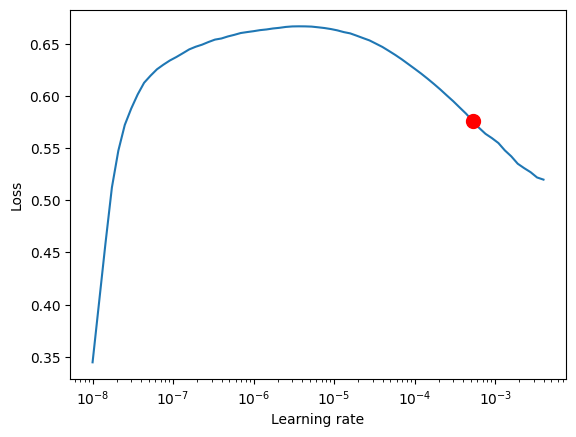

In [21]:
train_loader = DataLoader(
    train_dataset,
    collate_fn=collate_fn,
    batch_size=512,
    num_workers=8,
    pin_memory=True,
    shuffle=True,
    drop_last=True
)

validation_dataloader = DataLoader(
    validation_dataset,
    collate_fn=collate_fn,
    batch_size=512,
    num_workers=8,
    pin_memory=True,
    shuffle=True,
    drop_last=True
)

in_channels = dataset.num_features
hidden_channels = in_channels
out_channels = 1

model = Model(
    in_channels,
    hidden_channels,
    out_channels,
    1,
)

lightning_model = LitCHLPModel(model)

trainer = Trainer(
    max_epochs=10,
    accelerator='gpu',
    devices=1,
    log_every_n_steps=1,
    callbacks=[early_stop_callback]
)

tuner = Tuner(trainer)

lr_finder = tuner.lr_find(
    lightning_model,
    train_dataloaders=train_loader,
    val_dataloaders=validation_dataloader,
)

fig = lr_finder.plot(suggest=True)
fig.show()

new_lr = lr_finder.suggestion()
print(f"Learning rate suggerito dal LR finder: {new_lr}")

lightning_model.lr = new_lr

trainer = Trainer(
    max_epochs=1200,
    accelerator='gpu',
    devices=1,
    log_every_n_steps=1,
    callbacks=[early_stop_callback]
)

trainer.fit(lightning_model, train_loader, validation_dataloader)


In [22]:
# early_stop_callback = EarlyStopping(
#     monitor="val_loss",
#     patience=50,
#     verbose=True,
#     mode="min"
# )

# temp_dataset = IMDBHypergraphDataset("./data", pre_transform=pre_transform, transform=transform, force_reload=True)

# in_channels = temp_dataset.num_features
# hidden_channels = in_channels
# out_channels = 1

# model = Model(
#     in_channels,
#     hidden_channels,
#     out_channels,
#     1,
# )

# lightning_model = LitCHLPModel(model)

# data_module = CHLPDataModule(IMDBHypergraphDataset)

# trainer = Trainer(
#     max_epochs=1200,
#     accelerator='gpu',
#     devices=1,
#     log_every_n_steps=1,
#     callbacks=[early_stop_callback]
# )

# trainer.fit(lightning_model, datamodule=data_module)
